# Matplotlib

[Veja mais estilos de gráficos](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)


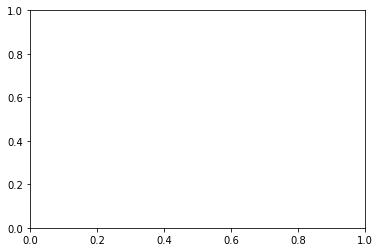

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# para criar uma Figura e os Eixos do gráfico:
fig, ax = plt.subplots()
plt.show()

### Small multiples
Para o caso de haver muitos dados e, uma vez colocados todos juntos, dificulta-se a visualização. 


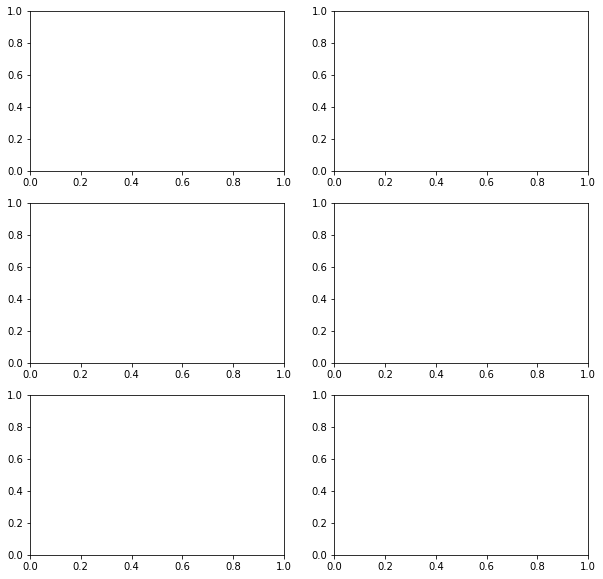

(3, 2)

In [27]:
fig, ax = plt.subplots(3,2) # 3 linhas e 2 colunas
fig.set_size_inches([10,10])
plt.show()
ax.shape #neste caso, a variável ax torna-se um array de tamanho 3x2

## Séries temporais 


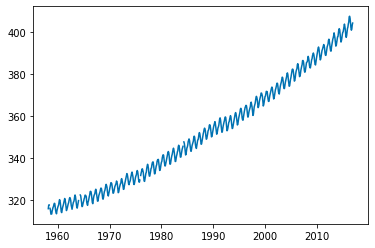

In [5]:
# Para transformar o index em DateTimeIndex, use parse_dates (list) e index_col (string)
arquivo_ts = pd.read_csv(r"C:\Users\anapa\OneDrive\Dados\datacamp\climate_change.csv", parse_dates=["date"], index_col="date")
climate_change = pd.DataFrame(arquivo_ts)
climate_change.index


fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
plt.show()

### Twin Axes
You've already seen how you could plot these time-series in separate sub-plots. Here, we're going to plot them in the same sub-plot, using two different y-axis scales. Again, we start by adding the first variable to our Axes. Then, we use the twinx method to create a twin of this Axes. This means that the two Axes share the same x-axis, but the y-axes are separate. We add the other variable to this second Axes object and show the figure.


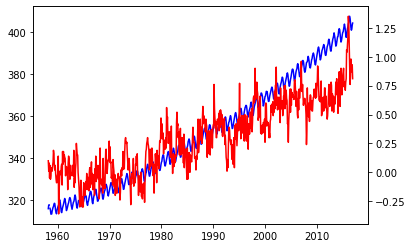

In [6]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

plt.show()

### Uma função que plota séries temporais


In [7]:

# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)


Agora vamos utilizar esta função para plotar os dados temporais (climate_change) utilizando DateTimeIndex e as medidas co2 e relative_temp. 

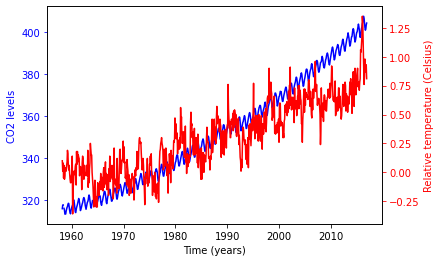

In [8]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

### Annotation
Uma forma de chamar atenção para determinada parte do gráfico e adicionar anotações. [Veja mais no site do matplotlib](https://matplotlib.org/2.0.2/users/annotations.html)
Vamos começar simples. 

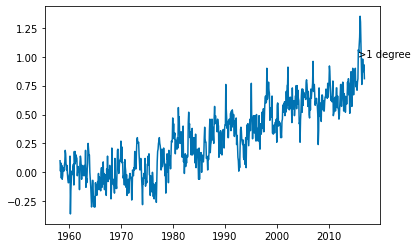

In [9]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=[pd.Timestamp('2015-10-06'), 1])

plt.show()

Vamos utilizar todas as funções. É possível colocar uma seta e personaliza-la para deixar claro o que está sendo "anotado" no gráfico. 

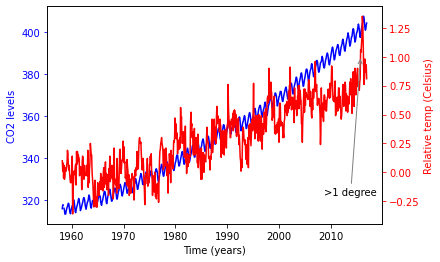

In [10]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, x=climate_change.index, y=climate_change['co2'], color='blue', xlabel="Time (years)", ylabel = "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, x=climate_change.index, y=climate_change["relative_temp"], color='red', xlabel="Time (years)", ylabel="Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

## Comparações quantitativas de dados


In [11]:
# O index será os nomes dos países
medals = pd.read_csv(r"C:\Users\anapa\OneDrive\Dados\datacamp\medals_by_country_2016.csv", index_col=0)
medals.head()


,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


Vamos visualizar os dados de medalhas de ouro nas Olimpíadas de 2016

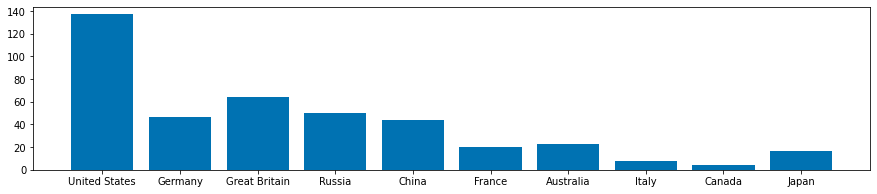

In [25]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
fig.set_size_inches([15,3]) #Para que os textos não fiquem sobrepostos
plt.show()

Como é possível visualizar, os nomes dos países se sobrepõem. Vamos consertar isso ao rotacionar os nomes. Além disso, vamos adicionar os dados de medalhas de Prata e de Bronze. 
De modo a tornar mais fácil de entender o gráfico, vamos adicionar uma legenda para cada cor.

<ipython-input-13-d7c898303e5b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


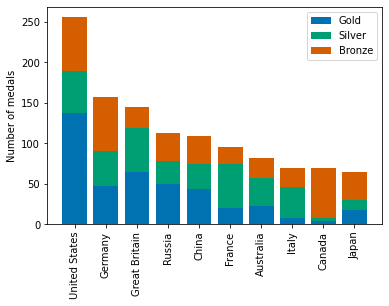

In [13]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"], label="Gold") #Adiciona o "label" para produção da legenda
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")

#Adiciona a legenda
ax.legend()
plt.show()

### Histogramas
Possibilita visualizar a distribuição dos valores dentro de uma variável. 

In [14]:
men = pd.read_csv(r"C:\Users\anapa\OneDrive\Dados\datacamp\medalist.csv", index_col=0)
men.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Vamos selecionar determinadas modalidades (como feito no DataCamp) e fazer um gráfico de barras das alturas dos atletas de cada esporte.

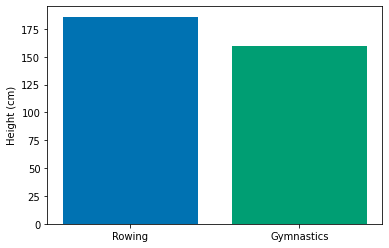

In [15]:
mens_rowing = pd.DataFrame(men[men['Sport']=='Rowing']) #remo
mens_gymnastics = pd.DataFrame(men[men['Sport']=='Gymnastics'])

fig,ax = plt.subplots()
ax.bar("Rowing", mens_rowing["Height"].mean())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean())
ax.set_ylabel("Height (cm)")
plt.show()


Para visualizar a distribuição das alturas, faremos um histograma. Neste caso, é preciso colocar uma legenda para sabermos qual é a modalidade dos atletas.


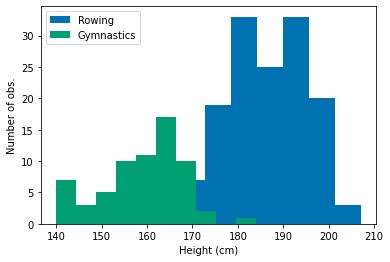

In [16]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label="Rowing")
ax.hist(mens_gymnastics["Height"], label="Gymnastics")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of obs.")
ax.legend()
plt.show()

Por default, o número de barras em um histograma é 10. É possível customizar este número, ao selecionar um número de barras (bins). Caso estivermos interessados em uma determinada sequência de valores, colocamos limites entre as barras, como mostrado a seguir:

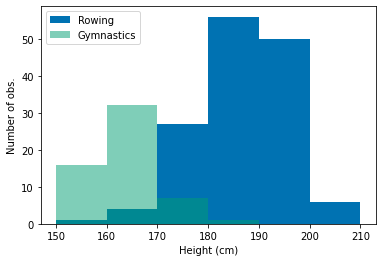

In [17]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label="Rowing", bins=[150,160,170,180,190,200,210])
ax.hist(mens_gymnastics["Height"], label="Gymnastics", bins=[150,160,170,180,190,200,210], alpha=0.5) 
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of obs.")
ax.legend()
plt.show()

Neste caso, deixamos também uma transparência em um dos histogramas para que fosse possível visualizar que existem atletas do remo com altura inferior a 170cm.

## Boxplots
This kind of plot shows us several landmarks in each distribution. The red line indicates the median height. The edges of the box portion at the center indicate the inter-quartile range of the data, between the 25th and the 75th percentiles. The whiskers at the ends of the thin bars indicate one and a half times the size of the inter-quartile range beyond the 75th and 25th percentiles. This should encompass roughly 99 percent of the distribution if the data is Gaussian or normal. Points that appear beyond the whiskers are outliers. That means that they have values larger or smaller than what you would expect for 99 percent of the data in a Gaussian or normal distribution. For example, there are three unusually short rowers in this sample, and one unusually high gymnast.



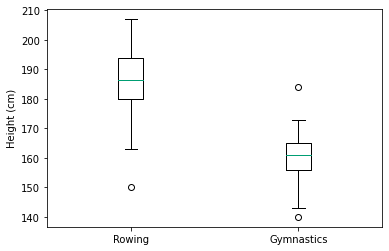

In [18]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

## Scatter plots
Bar charts show us the values of one variable across different conditions, such as different countries. But what if you want to compare the values of different variables across observations? This is sometimes called a bi-variate comparison, because it involves the values of two different variables. A standard visualization for bi-variate comparisons is a scatter plot. 

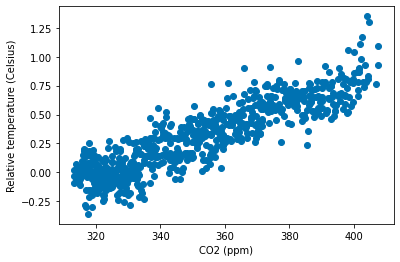

In [19]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

### Customizando scatter plots
Inicialmente, vamos separar dois cortes de tempo: anos 80 e anos 90

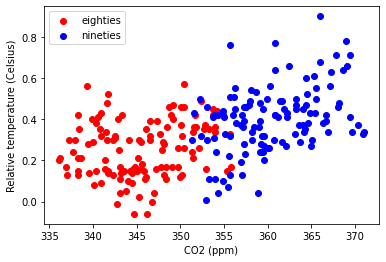

In [20]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig,ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")
ax.legend()

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

You can see that the relationship between temperatures and carbon dioxide didn't change much during these years, but both levels of carbon dioxide and temperatures continued to rise in the nineties.

But we can also use the color of the points to encode a third variable, providing additional information about the comparison. In the climate change data, we have a continuous variable denoting time stored in the DataFrame index. If we enter the index as input to the c key-word argument, this variable will get encoded as color.

O período em que os dados foram computados está ilustrado através das cores do pontos, sendo os pontos azuis escuro o início da série e os amarelos os períodos mais recentes.

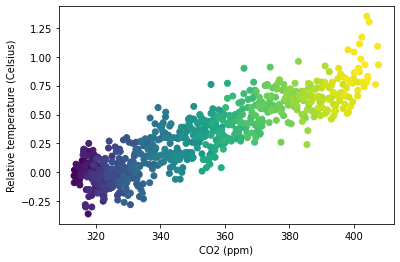

In [21]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c= climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

### Automações

Obtendo valores únicos de uma coluna:

In [33]:
sports = men["Sport"].unique()
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


Para obter a altura dos atletas de cada modalidade

<ipython-input-45-9b42e8c0cd7f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation = 90)


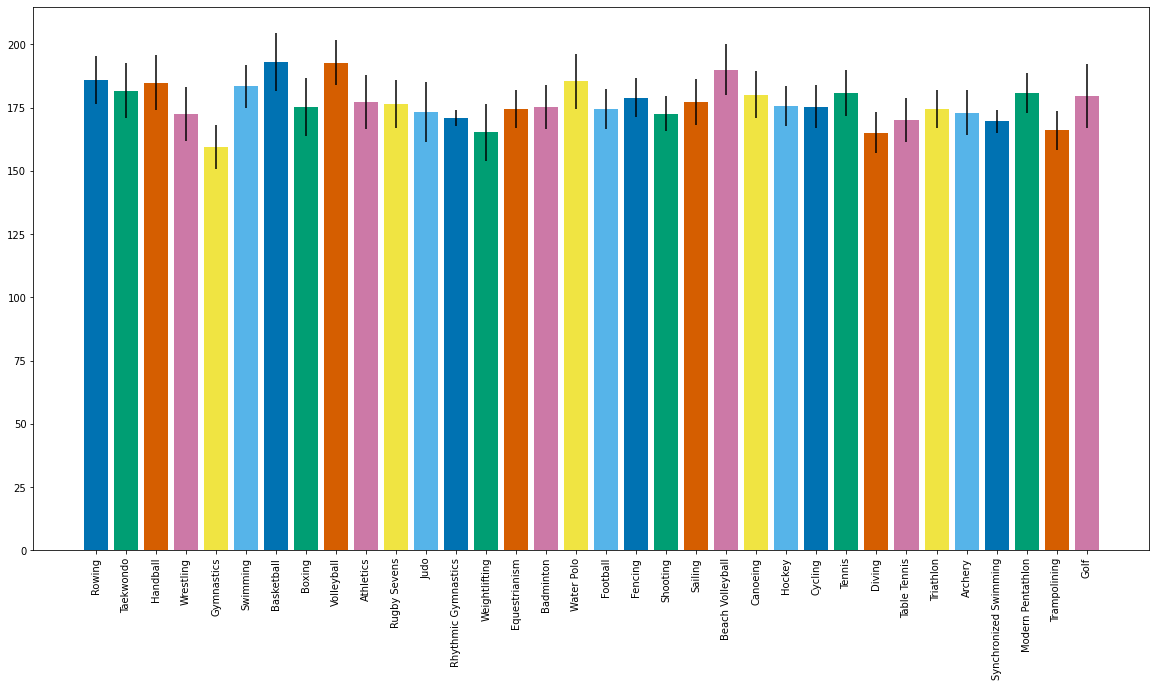

In [45]:
fig, ax = plt.subplots()
for sport in sports:
    sport_df = men[men["Sport"] == sport]
    ax.bar(sport, sport_df["Height"].mean(), yerr=sport_df["Height"].std())
fig.set_size_inches([20,10])
ax.set_xticklabels(sports, rotation = 90)
plt.show()
